# Distentangling the error and surrogate loss

In [1]:
# External modules.
import copy
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import nn
from torch.utils.data import DataLoader, TensorDataset
import os

# Internal modules.
from setup.directories import img_path
from setup.utils import makedir_safe, get_seeds
from setup.results import my_ext

In [2]:
# Create directory to save figures.
makedir_safe(img_path)

In [3]:
# Clerical setup.

# Seeds for multiple random trials.
num_trials = 5
base_seed = 22993514079364 # fixed seed.
#base_seed = np.random.SeedSequence().entropy # uncomment for fresh seeds.
random_seeds = get_seeds(base_seed=base_seed, num=num_trials)

# Device setup.
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using {} device.".format(device))

Using cuda device.


In [4]:
# Set up data to be plotted.
a = 2.0
X = np.array(([1.,-1.], [-1.,1.], [a,-a]))
Y = np.array(([0], [1], [1])).flatten()

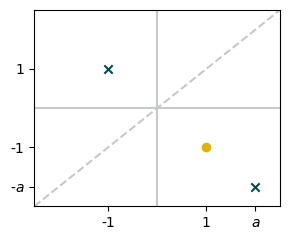

In [5]:
# Visualization.

fig, ax = plt.subplots(1, 1, figsize=(3,2.5))

horiz_points = np.linspace(-2.5, 2.5, 100)
line_separator = horiz_points
ax.plot(horiz_points, line_separator,
        color="xkcd:silver",
        linestyle="dashed")
#ax.plot(horiz_points, -line_separator,
#        color="xkcd:silver",
#        linestyle="dashed")
idx_0 = Y == 0
idx_1 = Y == 1
ax.scatter(X[idx_0,0], X[idx_0,1], marker="o", color="xkcd:gold")
ax.scatter(X[idx_1,0], X[idx_1,1], marker="x", color="xkcd:dark teal")
ax.axhline(y=0.0, color="xkcd:silver")
ax.axvline(x=0.0, color="xkcd:silver")

ticks_horiz = [-1, 1, a]
ticks_vert = [-a, -1, 1]
tick_labels_horiz = ["-1", "1", r"$a$"]
tick_labels_vert = [r"-$\mathit{a}$", "-1", "1"]
ax.set_xticks(ticks_horiz)
ax.set_xticklabels(tick_labels_horiz)
ax.set_yticks(ticks_vert)
ax.set_yticklabels(tick_labels_vert)

xlim_tuple = (-2.5, 2.5)
ylim_tuple = (-2.5, 2.5)
ax.set(xlim=xlim_tuple, ylim=ylim_tuple)
plt.tight_layout()
fname = os.path.join(img_path, "demo_surrogate_nolink_data.{}".format(my_ext))
plt.savefig(fname=fname)
plt.show()

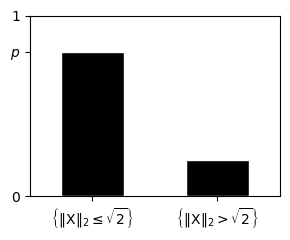

In [6]:
# Visuals.
p = 0.8
fig, ax = plt.subplots(1, 1, figsize=(3,2.5))
bin_width = 0.25
bin_starts = np.array([0.25/2, 0.5+0.25/2])
bar_positions = bin_starts + bin_width/2
probabilities = np.array([p, 1-p])
bars = ax.bar(bar_positions, probabilities, bin_width,
              color="xkcd:black",
              edgecolor="xkcd:white")
ticks_horiz = [0.25, 0.75]
ticks_vert = [0.0, p, 1.0]
tick_labels_horiz = [r"$\left\{ \Vert{\mathrm{X}}\Vert_{2} \leq \sqrt{2} \right\}$",
                     r"$\left\{ \Vert{\mathrm{X}}\Vert_{2} > \sqrt{2} \right\}$"]
tick_labels_vert = ["0", r"$p$", "1"]
ax.set_xticks(ticks_horiz)
ax.set_xticklabels(tick_labels_horiz)
ax.set_yticks(ticks_vert)
ax.set_yticklabels(tick_labels_vert)
ax.set(xlim=(0.0, 1.0), ylim=(0.0, 1.0))
plt.tight_layout()
fname = os.path.join(img_path, "demo_surrogate_nolink_probs.{}".format(my_ext))
plt.savefig(fname=fname)
plt.show()

___